[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 1.759737430640049


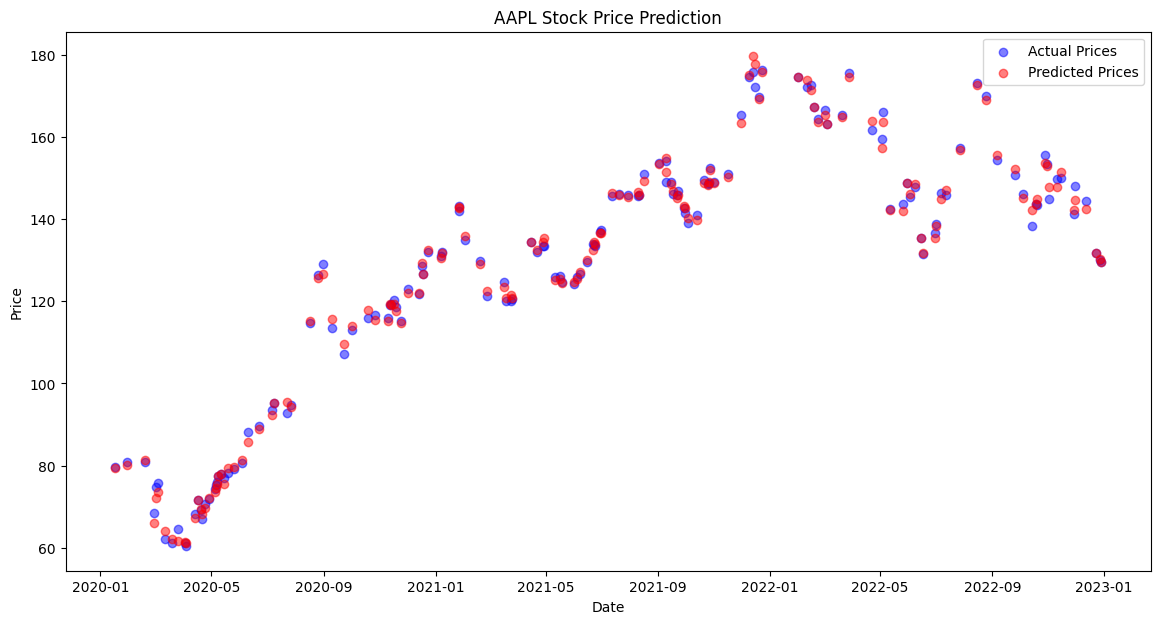

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Pour récupérer les données boursières
import yfinance as yf

# Télécharger les données historiques de l'action Apple
aapl = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Calculer les rendements quotidiens
aapl['Return'] = aapl['Close'].pct_change()

# Créer d'autres caractéristiques potentielles
aapl['MA_5'] = aapl['Close'].rolling(window=5).mean()
aapl['MA_10'] = aapl['Close'].rolling(window=10).mean()

# Nettoyer les données en supprimant les valeurs NaN
aapl.dropna(inplace=True)

# Définir les caractéristiques (X) et la cible (y)
X = aapl[['Open', 'High', 'Low', 'Volume', 'MA_5', 'MA_10']]
y = aapl['Close']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et entraîner le modèle de forêt aléatoire
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Faire des prévisions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Tracer les prévisions par rapport aux vraies valeurs
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(y_test.index, y_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.legend()
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 142.29081508909456


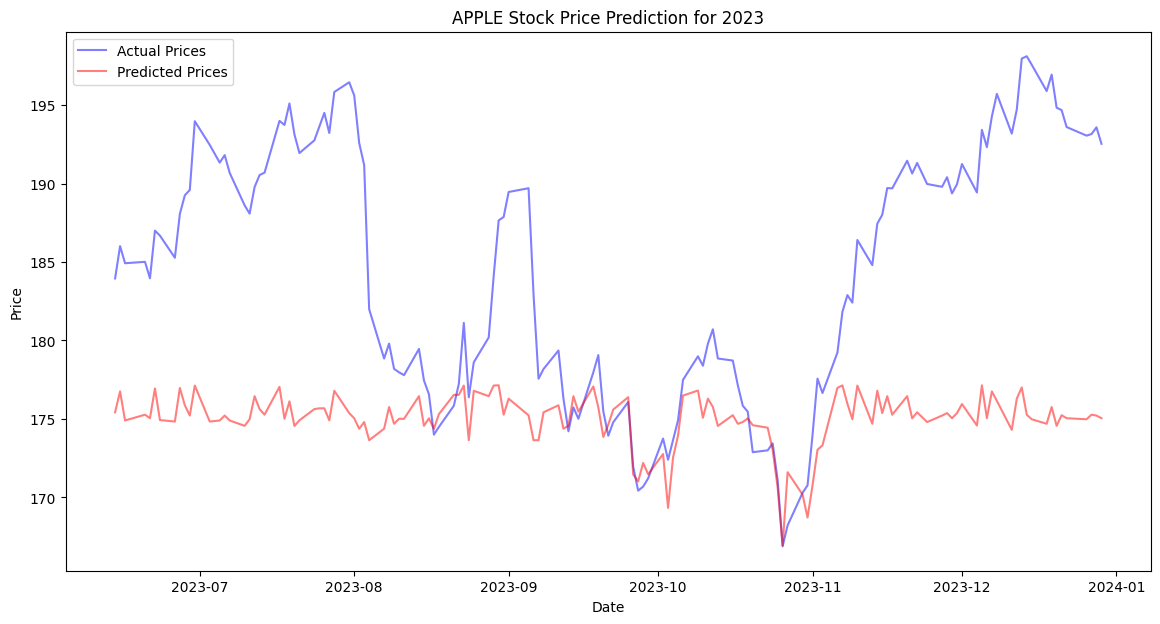

In [21]:
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Télécharger les données historiques de l'action Apple pour l'entraînement
aapl_train = yf.download('AAPL', start='2022-01-01', end='2023-06-01')
aapl_test = yf.download('AAPL', start='2023-06-01', end='2023-12-31')

# Préparer les caractéristiques d'entraînement
aapl_train['Return'] = aapl_train['Close'].pct_change()
aapl_train['MA_5'] = aapl_train['Close'].rolling(window=5).mean()
aapl_train['MA_10'] = aapl_train['Close'].rolling(window=10).mean()

# Supprimer les valeurs NaN
aapl_train.dropna(inplace=True)

# Sélectionner les caractéristiques et la cible pour l'entraînement
X_train = aapl_train[['Return', 'MA_5', 'MA_10']]
y_train = aapl_train['Close']

# Normaliser les caractéristiques d'entraînement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Entraîner le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Préparer les caractéristiques pour la période de prédiction
aapl_test['Return'] = aapl_test['Close'].pct_change()
aapl_test['MA_5'] = aapl_test['Close'].rolling(window=5).mean()
aapl_test['MA_10'] = aapl_test['Close'].rolling(window=10).mean()

# Supprimer les NaN dus aux moyennes mobiles
aapl_test.dropna(inplace=True)

# Sélectionner les caractéristiques pour la prédiction
X_test = aapl_test[['Return', 'MA_5', 'MA_10']]
y_test = aapl_test['Close']

# Normaliser les caractéristiques de prédiction
X_test_scaled = scaler.transform(X_test)

# Faire des prédictions
y_pred = model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Tracer les prévisions par rapport aux vraies valeurs
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', alpha=0.5)
plt.legend()
plt.title('APPLE Stock Price Prediction for 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 127.57496157045676


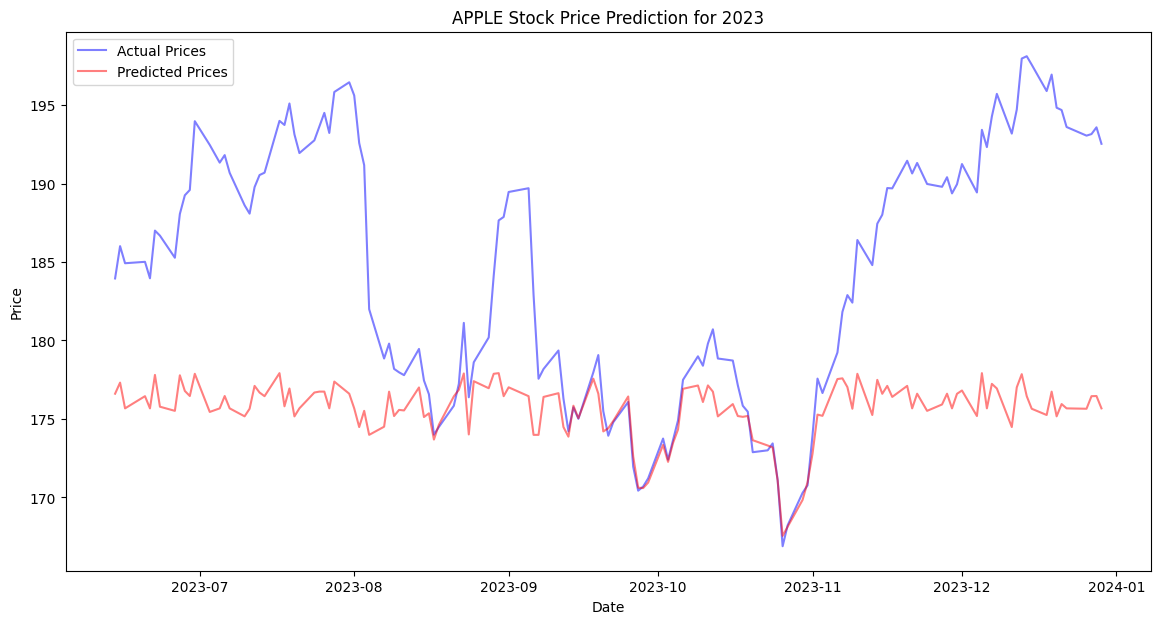

In [22]:
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download the historical data for LVMH Moët Hennessy Louis Vuitton SE
aapl_train = yf.download('AAPL', start='2022-01-01', end='2023-06-01')
aapl_test = yf.download('AAPL', start='2023-06-01', end='2023-12-31')

# Prepare training features
aapl_train['Return'] = aapl_train['Close'].pct_change()
aapl_train['MA_5'] = aapl_train['Close'].rolling(window=5).mean()
aapl_train['MA_10'] = aapl_train['Close'].rolling(window=10).mean()
aapl_train['Lagged_Close'] = aapl_train['Close'].shift(1) # Lagged Close Price

# Drop NaN values
aapl_train.dropna(inplace=True)

# Select features and target for training
X_train = aapl_train[['Return', 'MA_5', 'MA_10', 'Lagged_Close']]
y_train = aapl_train['Close']

# Normalize the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Prepare features for the prediction period
aapl_test['Return'] = aapl_test['Close'].pct_change()
aapl_test['MA_5'] = aapl_test['Close'].rolling(window=5).mean()
aapl_test['MA_10'] = aapl_test['Close'].rolling(window=10).mean()
aapl_test['Lagged_Close'] = aapl_test['Close'].shift(1) # Lagged Close Price

# Drop NaN values due to rolling means
aapl_test.dropna(inplace=True)

# Select features for prediction
X_test = aapl_test[['Return', 'MA_5', 'MA_10', 'Lagged_Close']]
y_test = aapl_test['Close']

# Normalize the prediction features
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot predictions against actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', alpha=0.5)
plt.legend()
plt.title('APPLE Stock Price Prediction for 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 0.0001490973517569974


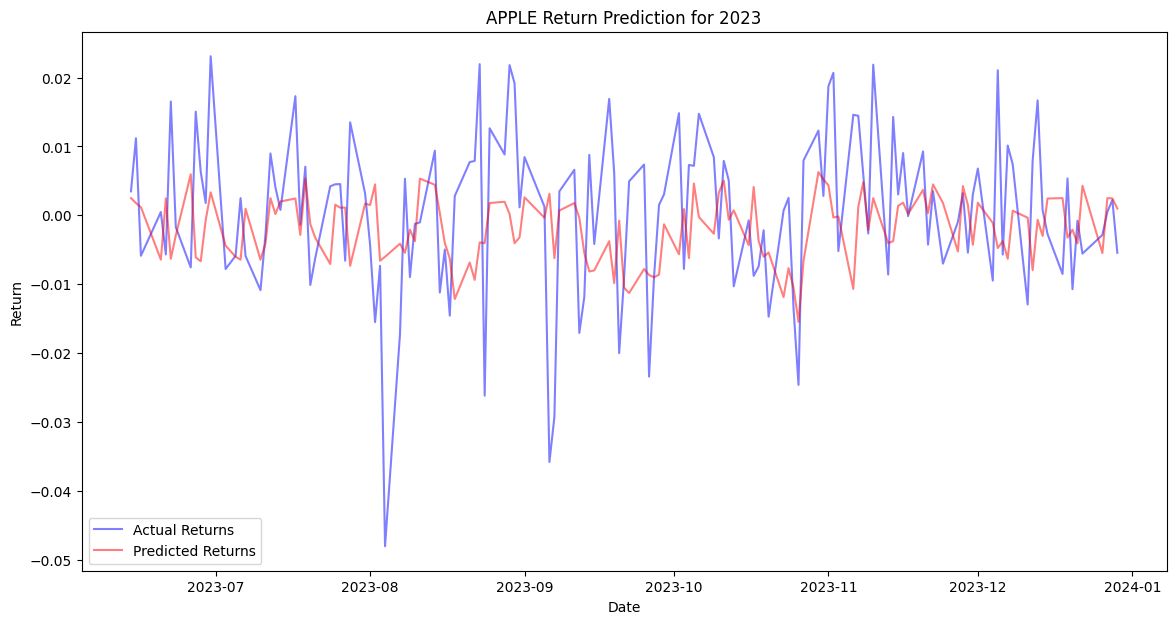

In [20]:
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download historical data for LVMH Moët Hennessy Louis Vuitton SE
aapl_train = yf.download('AAPL', start='2022-01-01', end='2023-06-01')
aapl_test = yf.download('AAPL', start='2023-06-01', end='2023-12-31')

# Prepare training features
aapl_train['Return'] = aapl_train['Close'].pct_change()
aapl_train['Lagged_Return'] = aapl_train['Return'].shift(1)  # Lagged Return
aapl_train['MA_5'] = aapl_train['Close'].rolling(window=5).mean()
aapl_train['MA_10'] = aapl_train['Close'].rolling(window=10).mean()

# Drop NaN values
aapl_train.dropna(inplace=True)

# Select features and target for training
X_train = aapl_train[['Lagged_Return', 'MA_5', 'MA_10']]
y_train = aapl_train['Return']

# Normalize the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Prepare features for the prediction period
aapl_test['Return'] = aapl_test['Close'].pct_change()
aapl_test['Lagged_Return'] = aapl_test['Return'].shift(1)  # Lagged Return
aapl_test['MA_5'] = aapl_test['Close'].rolling(window=5).mean()
aapl_test['MA_10'] = aapl_test['Close'].rolling(window=10).mean()

# Drop NaN values due to rolling means
aapl_test.dropna(inplace=True)

# Select features for prediction
X_test = aapl_test[['Lagged_Return', 'MA_5', 'MA_10']]
y_test = aapl_test['Return']

# Normalize the prediction features
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot predictions against actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Returns', color='blue', alpha=0.5)
plt.plot(y_test.index, y_pred, label='Predicted Returns', color='red', alpha=0.5)
plt.legend()
plt.title('APPLE Return Prediction for 2023')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd

# Télécharger les données historiques des prix de clôture de l'action Apple (AAPL)
apple_data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')

# Calcul de la moyenne et de l'écart-type des prix de clôture
mean_price = apple_data['Close'].mean()
std_price = apple_data['Close'].std()

# Calcul du z-score pour chaque prix de clôture
apple_data['Z-Score'] = (apple_data['Close'] - mean_price) / std_price

# Affichage des premières lignes des données avec z-score
apple_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Z-Score
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900,2.081401
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400,1.904472
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943970,94537600,1.538359
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,1.314708
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100,1.327729


[*********************100%%**********************]  1 of 1 completed


Mean Squared Error for KNN: 118.14082292384332


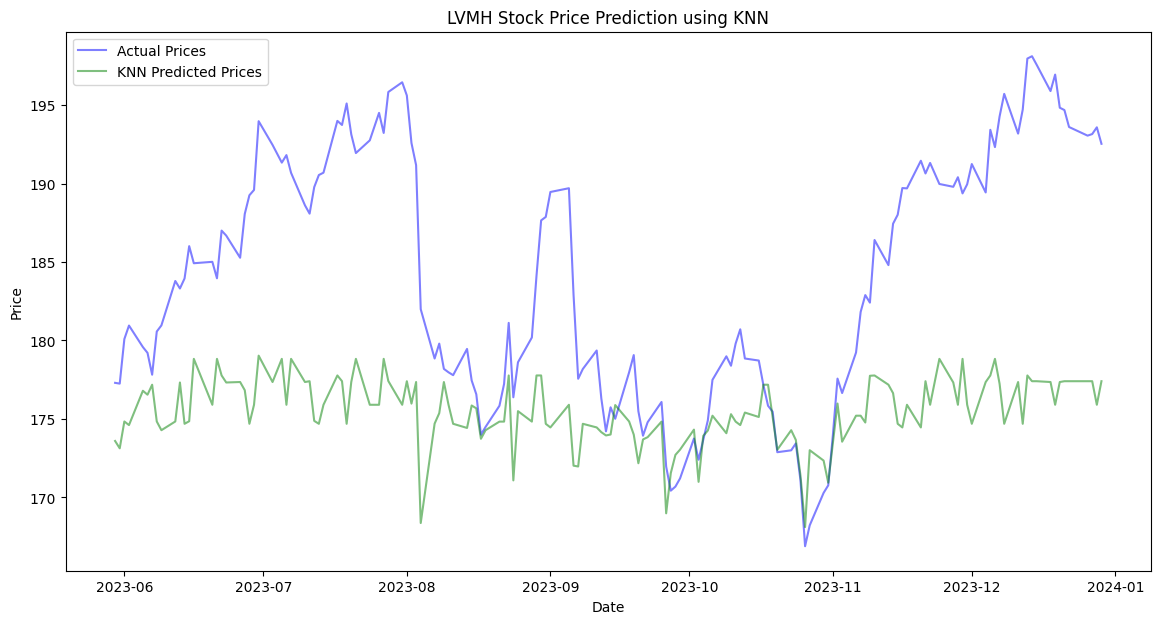

In [25]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download historical data for LVMH stock
aapl = yf.download('AAPL', start='2021-01-01', end='2023-12-31')

# Feature Engineering
aapl['Return'] = aapl['Close'].pct_change()
aapl['MA_5'] = aapl['Close'].rolling(window=5).mean()
aapl['MA_10'] = aapl['Close'].rolling(window=10).mean()

# Drop NaN values
aapl.dropna(inplace=True)

# Select features and target
X = aapl[['Return', 'MA_5', 'MA_10']]
y = aapl['Close']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error for KNN: {mse_knn}")

# Plot the predictions against the actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.plot(y_test.index, y_pred_knn, color='green', label='KNN Predicted Prices', alpha=0.5)
plt.legend()
plt.title('LVMH Stock Price Prediction using KNN')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


[*********************100%%**********************]  1 of 1 completed


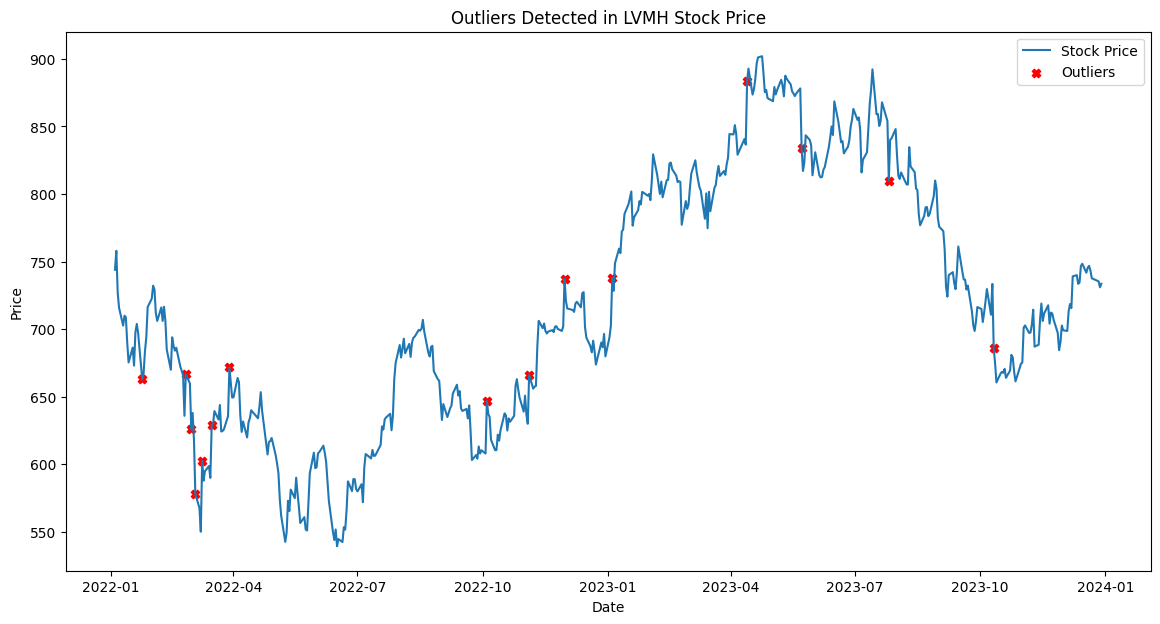

In [ ]:
import yfinance as yf
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Download historical data for LVMH stock
data = yf.download('MC.PA', start='2022-01-01', end='2023-12-31')

# Feature Engineering: Use daily returns as the feature for outlier detection
data['Daily_Return'] = data['Close'].pct_change()

# Prepare the data by dropping NaN values
data.dropna(inplace=True)

# Scale the features (daily returns in this case)
scaler = StandardScaler()
daily_returns_scaled = scaler.fit_transform(data['Daily_Return'].values.reshape(-1, 1))

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)  # These parameters need to be tuned
clusters = dbscan.fit_predict(daily_returns_scaled)

# Identify points classified as noise or outliers (-1 label from DBSCAN)
outlier_dates = data.index[clusters == -1]
outlier_values = data['Close'][clusters == -1]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Stock Price')
plt.scatter(outlier_dates, outlier_values, color='red', label='Outliers', marker='X')
plt.legend()
plt.title('Outliers Detected in LVMH Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
